# What makes you happy?

The answer varies from person to person. Its subjective, and because of that, its a challenge to a country to create public policies to elevate happiness of its population.

Fortunately, the World Happiness Report determined 6 elements of a nation happiness: 

- **GDP per capita**
- **Social support**
- **Healthy life expectancy at birth**
- **Freedom to make life choices**
- **Generosity**
- **Perceptions of corruption**

Additionally, they created a smart score, the **Ladder score**, where each person interviewed should imagine herself in a ladder numbered from 0 to 10, that represents her happiness, in which the higher, the better.

The next logical question is: how much each of that happiness elements affects the overall (ladder) happiness?

So, we will use a Regression to answer that question. We will use the 2021 data, with the **Ladder score** as `target` and the 6 elements as `features`.

The Regression will produce `coefficients`, that can be seen as **weights** for each element, showing which are more relevant to compose the happiness, according the 2021 world population.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis, skew
from sklearn.linear_model import ElasticNetCV
from matplotlib import pyplot as plt

In [2]:
UAE = "United Arab Emirates"

In [3]:
df = pd.read_csv("data/prepared.csv")
features = [c for c in df.columns if c not in ["Country name", "year", "target"]]

In [4]:
df

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,3.983,7.702,0.529,53.200,0.389,0.080,0.881
1,Afghanistan,2016,4.220,7.697,0.559,53.000,0.523,0.042,0.793
2,Afghanistan,2017,2.662,7.697,0.491,52.800,0.427,-0.121,0.954
3,Afghanistan,2018,2.694,7.692,0.508,52.600,0.374,-0.094,0.928
4,Afghanistan,2019,2.375,7.697,0.420,52.400,0.394,-0.108,0.924
...,...,...,...,...,...,...,...,...,...
957,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
958,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
959,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
960,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


## Specific preparation

We will use only the most recent data (2021), which will give us a more updated worldview.

In [5]:
df = df.loc[df["year"] == 2021]
df

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
813,Finland,2021,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
814,Denmark,2021,7.620,10.933,0.954,72.700,0.946,0.030,0.179
815,Switzerland,2021,7.571,11.117,0.942,74.400,0.919,0.025,0.292
816,Iceland,2021,7.554,10.878,0.983,73.000,0.955,0.160,0.673
817,Netherlands,2021,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
957,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
958,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
959,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
960,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [6]:
df = df.drop(columns="year")
df = df.set_index("Country name")
df

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179
Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292
Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673
Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...
Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167


In [7]:
df = df.rename(columns={"Ladder score": "target"})
features = [c for c in df.columns if c != "target"]
features

['Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [8]:
df[features].count()

Logged GDP per capita           149
Social support                  149
Healthy life expectancy         149
Freedom to make life choices    149
Generosity                      149
Perceptions of corruption       149
dtype: int64

Its a good practice to scale the data. Some algorithms can give more importance to fields with a higher scale.

In [9]:
mms = MinMaxScaler()
target = df["target"]
df = pd.DataFrame(mms.fit_transform(df[features]), index=df.index, columns=features)
df["target"] = target
df

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,target
Country name,,,,,,,
Finland,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354,7.842
Denmark,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186,7.620
Switzerland,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041,7.571
Iceland,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615,7.554
Netherlands,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716,7.464
...,...,...,...,...,...,...,...
Lesotho,0.257582,0.623077,0.007796,0.566327,0.189157,0.971995,3.512
Botswana,0.627893,0.617308,0.378964,0.751701,0.050602,0.838973,3.467
Rwanda,0.207702,0.171154,0.453802,0.875850,0.420482,0.099183,3.415


In [10]:
df[features].corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Logged GDP per capita,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


`Logged GDP per capita` is **colinear** with `Healty life expectancy`. Depending on the Regression method that colinearity should be handled, to avoid awkward coefficients (and awkard results).

## Regression

I decided to use a Elastic Net regression, because it is more resistent to colinearity. Thus, I don't have to remove any field and I can have a more complete explanation for the phenomena.

Additionaly, I'm using the **cross-validation** method, which is primarily used to check the model performance against unseen data. However, the objective here is to use all data (there will be no unseen data) **and** to have a more reliable metric. 

In [11]:
lr = ElasticNetCV(cv=5, random_state=2021)

In [12]:
lr.fit(df[features], df["target"])

ElasticNetCV(cv=5, random_state=2021)

Elastic Net is a regression method that combines two regularization techniques, **Lasso** and **Ridge**. 

The variable $\alpha$ represents the amount of regularization, while the $L1$ ratio variable say to us how the two regularizations are used. In this case, both regularizations were used in equal proportion.

Lastly, the score is the **coefficient of determination**, $R^2$. It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. The best possible value for $R^2$ is 1 and 0.75 is considered good.

source: https://scikit-learn.org

In [13]:
lr.alpha_, lr.l1_ratio_, lr.score(df[features], df["target"])

(0.0003894904256449988, 0.5, 0.7558391528722437)

Checking only the $R^2$ is not enough to determine the model quality. An important assumption is that the normality of the **residuals**, i.e.,the difference between the ground truth and the prediction.

There are many ways to determine the normality of the residuals. Here I'll two simple and quick methods:
- histogram analysis
- skewness and kurtosis

source: https://online.stat.psu.edu

In [14]:
df["prediction"] = lr.predict(df[features])
df["residuals"] = df["target"] - df["prediction"]

In [15]:
df

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,target,prediction,residuals
Country name,,,,,,,,,
Finland,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354,7.842,7.075548,0.766452
Denmark,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186,7.620,7.184340,0.435660
Switzerland,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041,7.571,7.133660,0.437340
Iceland,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615,7.554,7.015792,0.538208
Netherlands,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716,7.464,7.034670,0.429330
...,...,...,...,...,...,...,...,...,...
Lesotho,0.257582,0.623077,0.007796,0.566327,0.189157,0.971995,3.512,4.241511,-0.729511
Botswana,0.627893,0.617308,0.378964,0.751701,0.050602,0.838973,3.467,5.317788,-1.850788
Rwanda,0.207702,0.171154,0.453802,0.875850,0.420482,0.099183,3.415,4.863152,-1.448152


The histogram shows a both slightly negative skewness and platykurtic kurtosis, what makes me consider the normality of the residuals.

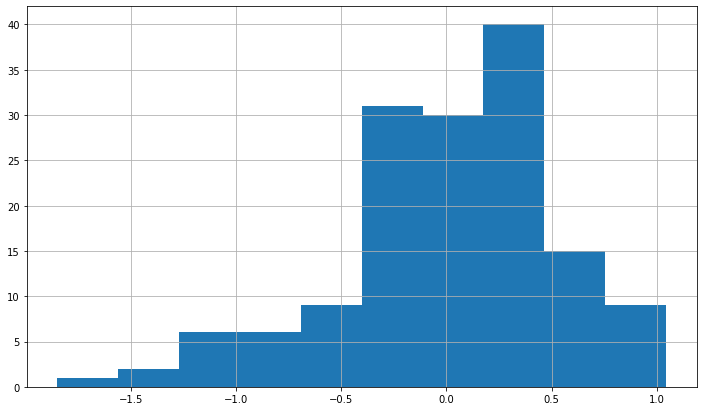

In [16]:
plt.figure(figsize=(12, 7))
df["residuals"].hist()
plt.show()

The histogram analysis is attested by the skewness and kurtosis calculation.

source: https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon

In [17]:
# kurtosis and skewness: 
kurtosis(df["residuals"]), skew(df["residuals"])

(0.6459688958423704, -0.6687429158233427)

Thus, we can consider the coefficients generated by the model as fair weights.

In [18]:
importance = pd.DataFrame(zip(features, lr.coef_), columns=["Feature", "Importance"])
importance.set_index("Feature", inplace=True)
importance.transpose()


Feature,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Importance,1.390362,1.284283,0.869425,1.176383,0.294168,-0.517242


In [19]:
coefs = importance["Importance"].to_dict()

Here we get the UAE values for the 6 elements. We note that the best aspects for the country are **Freedom to make life choices**, **GDP per capita**, and **Social support**. On the other hand, **Healthy life expectancy**, **Generosity**, and **Perceptions of corruption** could be better.

In [20]:
df.loc[[UAE], features].reset_index(drop=True)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.887869,0.732692,0.66216,0.935374,0.436145,0.591599


In [21]:
uae_values = df.loc[UAE, features].to_dict()

The values for the 6 elements in the survey were obtained from UAE citizens, and aren't necessarily connected to the worldview parameters. We should "adjust" these values with the model coefficients.

This adjustment is important due to the nature of UAE demographics, which has around of 89% of the population formed by expatriates. As the country largely depends of immigrants to function, adapting itself to the worldview will create a better image for the country, and, consequently, bring more people who want to live here.

source: https://www.globalmediainsight.com/blog/uae-population-statistics/

In [22]:
uae_adj = dict()
for k in coefs.keys():
    uae_adj[k] = coefs[k] * uae_values[k]
adj = pd.DataFrame([uae_adj])
adj

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.234459,0.940984,0.575698,1.100358,0.1283,-0.306


The variable `Perceptions of corruption` is showing better opportunity of improvement, However, there is no data in the report for UAE in the previous years. So we will select a second variable, `Generosity`, to a deeper analysis.